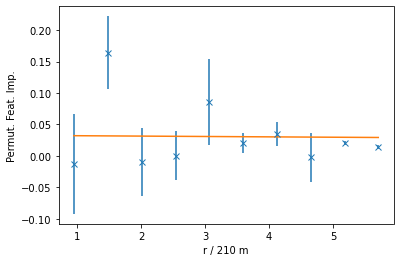

In [13]:
import matplotlib.pyplot as plt
import numpy as np
path = ""
fname = "new_test_analysis_gain.data"

radii = []
mean = []
std = []

with open(path + fname, "r") as mFile:
    lines = mFile.readlines()
    
    flag = False
    paramFlag = False
    for line in lines:
        
        if flag:
            arr = line.split(',')
            
            if len(arr) < 3:
                flag = False
                continue
                
            radii.append(float(arr[0]))
            mean.append(float(arr[1]))
            std.append(float(arr[2]))
            
        if paramFlag:
            arr = line.split(',')
            popt = np.array([float(arr[2]), float(arr[0])])
        
        if "Radius,Mean,Std" in line or flag:
            flag = True
        
        if "r0,a" in line:
            paramFlag=True
            
        
# plot result
fig = plt.figure()

plt.errorbar(radii, mean, yerr=std, fmt='x')

xs = np.linspace(radii[0], radii[-1], 100)

def model(x, a, r0):
    return a * np.exp(- x / r0)

try:
    plt.plot(xs, model(xs, *popt))
except:
    pass

plt.xlabel("r / 210 m")
plt.ylabel("Permut. Feat. Imp.")
plt.show()

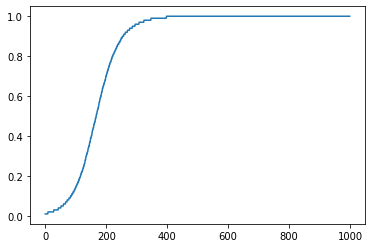

In [10]:
import numpy as np
import matplotlib.pyplot as plt

file = open("Sim_Aug-23-2021-12-33-03.log").readlines()
array = [float(line) for line in file[1:]]

plt.plot(array)

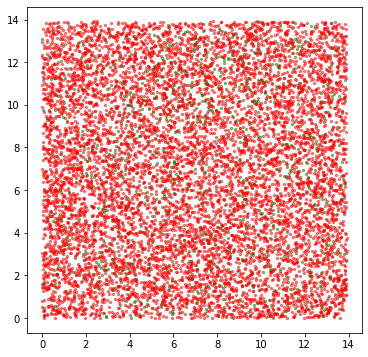

In [17]:
import pandas as pd

df = pd.read_csv("data_Aug-23-2021-12-33-03_n-0.10_.csv")

# add figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

cellsx = df["locx"][df["state"] == True]
cellsy = df["locy"][df["state"] == True]
emptyx = df["locx"][df["state"] == False]
emptyy = df["locy"][df["state"] == False]

ax.scatter(cellsx, cellsy, color='green', s=5, alpha=0.5)
ax.scatter(emptyx, emptyy, color='red', s=5, alpha=0.5)

In [18]:
df

,Unnamed: 0,state,locx,locy,gain-r-0.95,r-0.95,gain-r-1.43,r-1.43,gain-r-1.90,r-1.90,...,gain-r-3.33,r-3.33,gain-r-3.81,r-3.81,gain-r-4.29,r-4.29,gain-r-4.76,r-4.76,gain-r-5.24,r-5.24
0,0,True,7.634223,9.948580,0.217391,0.217391,-0.049107,0.168285,-0.019388,0.148897,...,-0.008285,0.135802,-0.004144,0.131659,-0.008688,0.122971,-0.004415,0.118555,-0.002711,0.115845
1,1,False,8.384688,7.579551,0.054054,0.054054,0.037151,0.091205,-0.007724,0.083481,...,0.010911,0.108045,-0.000068,0.107977,0.002750,0.110727,0.002455,0.113181,0.000632,0.113814
2,2,False,5.893214,8.984655,0.126866,0.126866,-0.001866,0.125000,0.011442,0.136442,...,-0.004546,0.126157,-0.004249,0.121908,-0.000093,0.121815,-0.008975,0.112840,-0.006815,0.106026
3,3,True,6.087019,12.404932,0.172414,0.172414,-0.025935,0.146479,-0.011154,0.135325,...,0.002231,0.140288,-0.008256,0.132032,-0.004553,0.127479,-0.006135,0.121344,-0.004862,0.116482
4,4,False,13.404948,5.333830,0.088000,0.088000,0.005117,0.093117,-0.011028,0.082090,...,0.000045,0.094503,0.004078,0.098581,0.002078,0.100659,-0.001600,0.099059,0.000036,0.099095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,False,7.467219,7.354633,0.064516,0.064516,-0.010719,0.053797,0.032622,0.086420,...,-0.002434,0.099476,0.014099,0.113576,-0.000583,0.112992,-0.001262,0.111730,0.002243,0.113973
9996,9996,False,8.442907,9.811066,0.137405,0.137405,0.040227,0.177632,-0.025089,0.152542,...,-0.003987,0.128571,-0.005136,0.123435,0.001521,0.124957,-0.003397,0.121560,-0.004991,0.116569
9997,9997,True,13.264286,10.407417,0.126866,0.126866,-0.042188,0.084677,-0.000708,0.083969,...,0.005959,0.100457,0.001630,0.102086,0.004244,0.106331,0.002826,0.109157,0.000049,0.109206
9998,9998,False,4.149012,6.210385,0.102941,0.102941,-0.013984,0.088957,0.016122,0.105079,...,-0.004885,0.093049,-0.000644,0.092405,0.001941,0.094346,-0.000248,0.094098,0.003257,0.097355


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier as RF


columns = [item for item in df.columns[1:] if 'gain' in item]
data = df[columns]
targets = df["state"]

X_train, X_test, y_train, y_test = train_test_split(
    data, targets, random_state=100)

n_est = 100
model = RF(n_estimators=n_est).fit(X_train, y_train)

# output
print("Trained Random Forest with n_est=%d." % n_est)
print("--- Test Sample Size: \t %d" % y_test.size)
print("--- Train Sample Size: \t %d" % y_train.size)
print("\n--> Score: \t %.2f" % model.score(X_test, y_test))

# calculate importances
imp = permutation_importance(
    model, X_test, y_test,
    n_repeats=40, random_state=100, scoring='roc_auc')


Trained Random Forest with n_est=100.
--- Test Sample Size: 	 2500
--- Train Sample Size: 	 7500

--> Score: 	 0.90


In [45]:
from numpy import array, inf, exp
from scipy.optimize import curve_f

def model(x, a, r0):
    return a * exp(- x / r0)

mean = imp.importances_mean
std = imp.importances_std

# plot result
fig = plt.figure()

labels = [float(txt.split('gain-r-')[-1]) for txt in columns]
plt.errorbar(labels, mean, yerr=std, fmt='x')

rmin = labels[0]
rmax = labels[-1]
xs = np.linspace(rmin, rmax, 100)

# fit exp function to data
x0 = array([0.0, 0.1])
bnds = (array([-inf, 0.0]), array([inf, inf]))
popt, pcov = curve_fit(model, labels, mean[:], p0=x0, bounds=bnds)
plt.plot(xs, model(xs, *popt))

plt.xlabel("r / 210 m")
plt.ylabel("Permut. Feat. Imp.")
plt.show()

ImportError: cannot import name 'curve_fit' from 'numpy' (c:\python\python39\lib\site-packages\numpy\__init__.py)

In [ ]:
"""
Train Random Forest and compute feature importance.
"""


data = 

# prepare data
data = stack(list(self.features.values()), axis=1)
targets = self.state

X_train, X_test, y_train, y_test = train_test_split(
    data, targets, random_state=100)

n_est = 100
model = RF(n_estimators=n_est).fit(X_train, y_train)

# output
print("Trained Random Forest with n_est=%d." % n_est)
print("--- Test Sample Size: \t %d" % y_test.size)
print("--- Train Sample Size: \t %d" % y_train.size)
print("\n--> Score: \t %.2f" % model.score(X_test, y_test))

# calculate importances
imp = permutation_importance(
    model, X_test, y_test,
    n_repeats=40, random_state=100, scoring='roc_auc')



return imp.importances_mean, imp.importances_std

if density_gain:
    mFile.write("## Density Gain\n")
    raw_mean, raw_std = p.analyse_gain(mFile)
else:
    mFile.write("## Absolute Density\n")
    raw_mean, raw_std = p.analyse(mFile)

mean = raw_mean * 1
std = raw_std * 1

# fit exp function to data
x0 = array([0.0, 0.1])
bnds = (array([-inf, 0.0]), array([inf, inf]))
#nmax = 5

mFile.write("\nRadius,Mean,Std\n")
for r, m, s in zip(array(list(p.features.keys())[:]), mean, std):
    mFile.write("%.2f,%.4f,%.4f\n" % (r, m, s))

try:
    popt, pcov = curve_fit(model, array(list(p.features.keys())[:]), mean[:], p0=x0, bounds=bnds)

    # output
    #print("\nSolver terminated successfully with nit=%d" % result.nit)
    perr = np.sqrt(np.diag(pcov))
    mFile.write("\n-----------------------\n")
    mFile.write("Fit: r0,err_r0,a,err_a\n")
    mFile.write("%.4f,%.4f,%.4f,%.4f\n" % (popt[1], perr[1], popt[0], perr[0]))
    #print("--> b = %.3f" % result.x[2])
except RuntimeError:
    mFile.write('\n Analysis failed -> not converging\n')